<h1 align="center">Ad Click Prediction using Machine Learning</h1>

<p align="center">This Jupyter Notebook focuses on predicting whether a user would click on an advertisement using a supervised machine learning approach. The project involves data preprocessing, model selection, training, evaluation, and analysis. The following libraries are imported for various tasks throughout the notebook:</p>

<h2 align="center">Libraries Used</h2>

<p align="center">

- **pandas** (`import pandas as pd`): A powerful data manipulation and analysis library used to load, preprocess, and analyze tabular data efficiently.

- **numpy** (`import numpy as np`): A fundamental package for numerical computations in Python, essential for handling arrays and mathematical operations.

- **seaborn** (`import seaborn as sns`): A visualization library based on Matplotlib that provides attractive and informative statistical graphics.

- **matplotlib.pyplot** (`import matplotlib.pyplot as plt`): A plotting library for creating visualizations and charts, essential for data visualization.

- **train_test_split** from **sklearn.model_selection** (`from sklearn.model_selection import train_test_split`): A function to split the dataset into training and testing sets for model training and evaluation.

- **LogisticRegression** from **sklearn.linear_model** (`from sklearn.linear_model import LogisticRegression`): A linear classification algorithm used for binary classification tasks.

- **SMOTE** from **imblearn.over_sampling** (`from imblearn.over_sampling import SMOTE`): A technique for oversampling the minority class in imbalanced datasets to improve model performance.

- **RandomUnderSampler** from **imblearn.under_sampling** (`from imblearn.under_sampling import RandomUnderSampler`): A technique for undersampling the majority class to balance the dataset.

- **Pipeline** from **imblearn.pipeline** (`from imblearn.pipeline import Pipeline`): A tool for chaining together multiple steps in a machine learning workflow.

- **accuracy_score** from **sklearn.metrics** (`from sklearn.metrics import accuracy_score`): A metric used to evaluate classification accuracy.

- **confusion_matrix** and **classification_report** from **sklearn.metrics** (`from sklearn.metrics import confusion_matrix, classification_report`): Tools for generating confusion matrices and classification reports for evaluating model performance.

- **tree** from **sklearn** (`from sklearn import tree`): Module containing decision tree-related classes and functions.

- **GridSearchCV** from **sklearn.model_selection** (`from sklearn.model_selection import GridSearchCV`): A method for performing grid search to find optimal hyperparameters for a model.

- **RandomForestClassifier** from **sklearn.ensemble** (`from sklearn.ensemble import RandomForestClassifier`): An ensemble learning method based on decision trees for classification tasks.

- **roc_curve** from **sklearn.metrics** (`from sklearn.metrics import roc_curve`): A function to compute Receiver Operating Characteristic (ROC) curves.

- **roc_auc_score** from **sklearn.metrics** (`from sklearn.metrics import roc_auc_score`): A metric used to calculate the area under the ROC curve, which measures model performance.

- **PrettyTable** (`from prettytable import PrettyTable`): A library for creating formatted and customizable tables in Python.

- **precision_recall_fscore_support** as **score** from **sklearn.metrics** (`from sklearn.metrics import precision_recall_fscore_support as score`): A function for calculating precision, recall, F1-score, and support for different classes.

- **svm** from **sklearn** (`from sklearn import svm`): Module containing Support Vector Machine (SVM) algorithms for classification tasks.

- **GradientBoostingClassifier** from **sklearn.ensemble** (`from sklearn.ensemble import GradientBoostingClassifier`): An ensemble learning method that builds a strong classifier by combining the outputs of multiple weak classifiers (typically decision trees).

- **GaussianNB** from **sklearn.naive_bayes** (`from sklearn.naive_bayes import GaussianNB`): A naive Bayes algorithm implementation for classification tasks.

</p>

<p align="center">Throughout this notebook, these libraries will be used for data analysis, model training, evaluation, and visualization. The goal is to develop a predictive model that can assist in understanding user behavior towards online advertisements.</p>


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import tree
import missingno as msno
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from prettytable import PrettyTable
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
import itertools
from sklearn.naive_bayes import GaussianNB

In [3]:
ad_df = pd.read_csv("/Users/ravikumarnalawade/Documents/Main IMP/ADClickPrediction/-AdClickPredictor-Predicting-User-Clicks-on-Online-Advertisements-/Dataset/advertising.csv")
ad_df.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


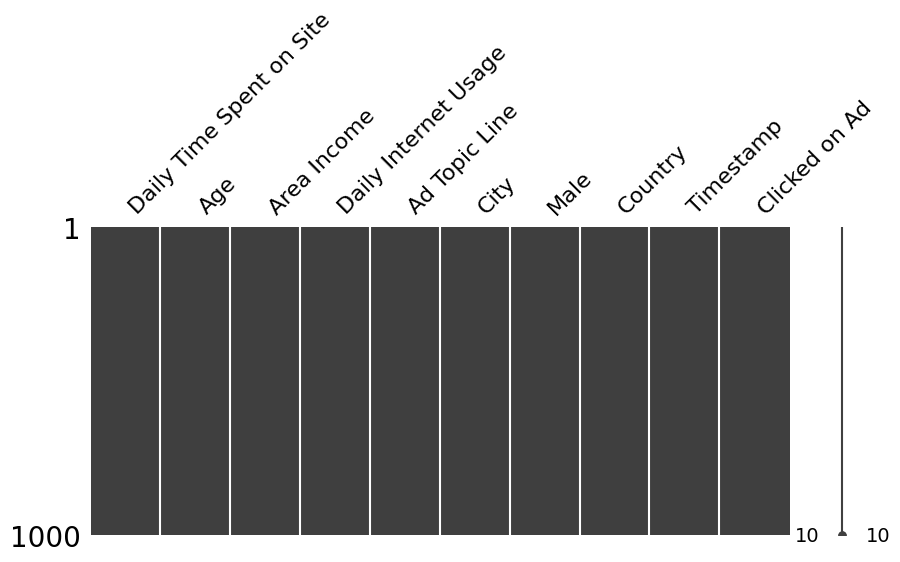

In [5]:

# Plot a matrix showing missing values
msno.matrix(ad_df, figsize=(10, 4))
plt.show()


> Since there are no null values in our dataset, we can use a different visualization technique to gain insights into the distribution of our data. One common approach is to create histograms or density plots for each numerical feature in your dataset. Here's how we can do it using the seaborn library.

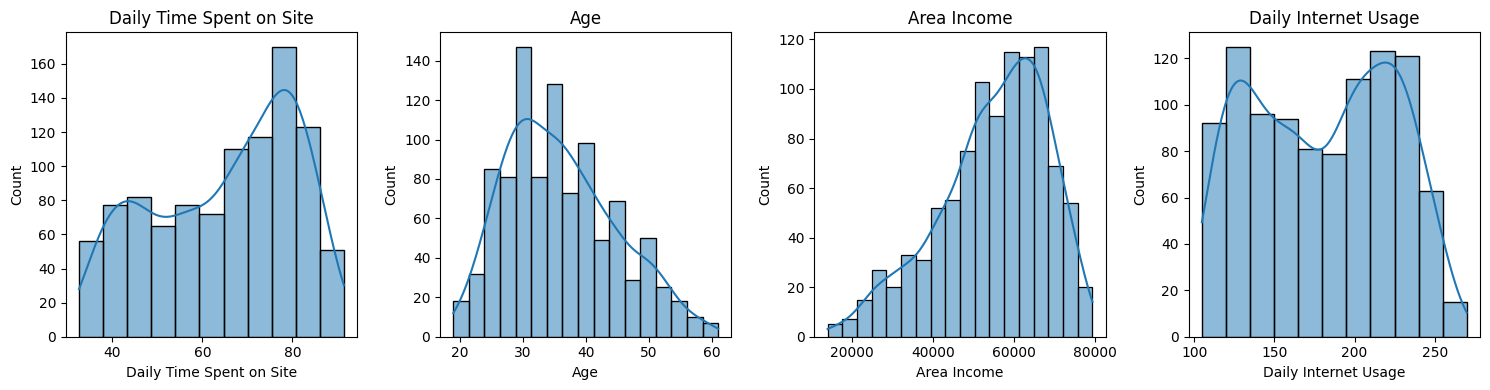

In [6]:
# Select numerical columns for plotting
numerical_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

# Create subplots for each numerical feature
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 4))

# Plot histograms or density plots
for i, column in enumerate(numerical_columns):
    sns.histplot(data=ad_df, x=column, ax=axes[i], kde=True)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

The next code cell converts the 'Timestamp' column in the DataFrame to a timestamp data type and then creates new columns 'Day', 'Month', 'Year', 'Hour', and 'Minute' by extracting corresponding components from the timestamp.

In [12]:
# Convert the 'Timestamp' column to Timestamp
ad_df['Timestamp'] = pd.to_datetime(ad_df['Timestamp'])

# Split the Timestamp column into separate components
ad_df['Day'] = ad_df['Timestamp'].dt.day
ad_df['Month'] = ad_df['Timestamp'].dt.month
ad_df['Year'] = ad_df['Timestamp'].dt.year
ad_df['Hour'] = ad_df['Timestamp'].dt.hour
ad_df['Minute'] = ad_df['Timestamp'].dt.minute


The Following code generates two bar plots to visualize the hourly distribution of clicks and non-clicks in an advertising dataset. 

Each plot shows how the count of clicks or non-clicks varies across different hours of the day, helping to uncover patterns in user engagement with ads based on timing.

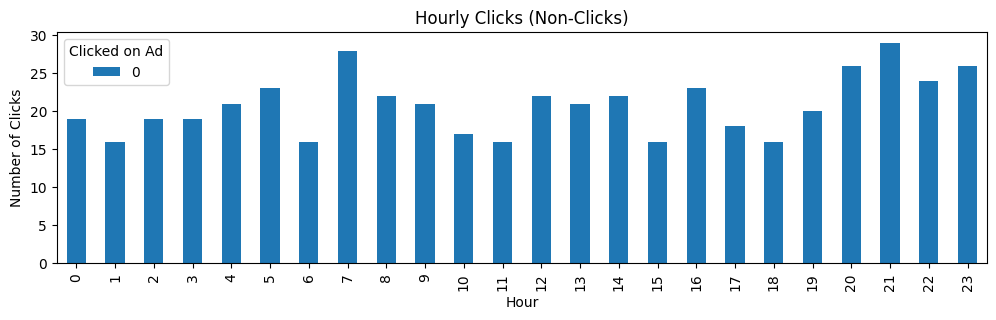

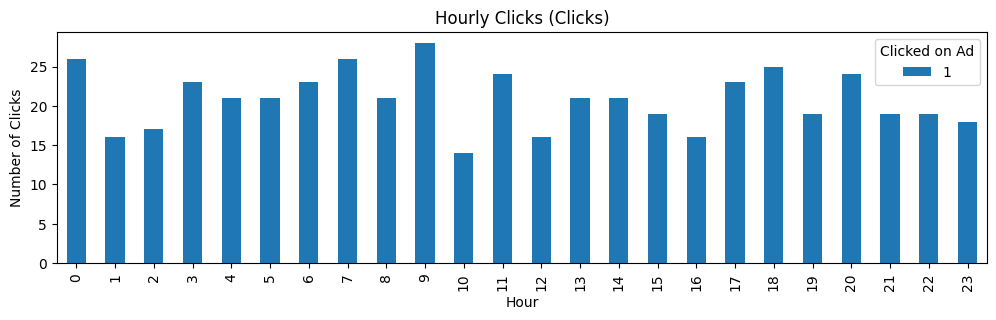

In [11]:
#Plot for non-clicks
ad_df[ad_df['Clicked on Ad'] == 0].groupby(['Hour', 'Clicked on Ad']).size().unstack().plot(kind='bar', title="Hourly Clicks (Non-Clicks)", figsize=(12, 3))
plt.xlabel('Hour')
plt.ylabel('Number of Clicks')
plt.show()

# Plot for clicks
ad_df[ad_df['Clicked on Ad'] == 1].groupby(['Hour', 'Clicked on Ad']).size().unstack().plot(kind='bar', title="Hourly Clicks (Clicks)", figsize=(12, 3))
plt.xlabel('Hour')
plt.ylabel('Number of Clicks')
plt.show()


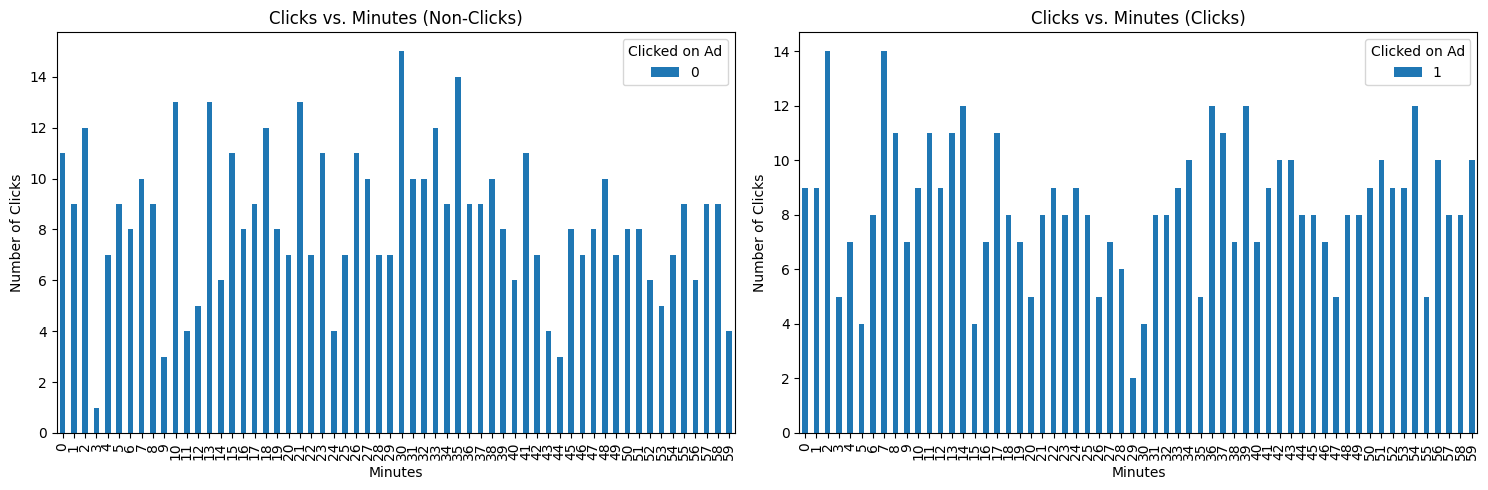

In [13]:
# Create a 1x2 subplot grid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot for non-clicks
ad_df[ad_df['Clicked on Ad'] == 0].groupby(['Minute', 'Clicked on Ad']).size().unstack().plot(kind='bar', title="Clicks vs. Minutes (Non-Clicks)", ax=axes[0])
axes[0].set_xlabel('Minutes')
axes[0].set_ylabel('Number of Clicks')

# Plot for clicks
ad_df[ad_df['Clicked on Ad'] == 1].groupby(['Minute', 'Clicked on Ad']).size().unstack().plot(kind='bar', title="Clicks vs. Minutes (Clicks)", ax=axes[1])
axes[1].set_xlabel('Minutes')
axes[1].set_ylabel('Number of Clicks')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


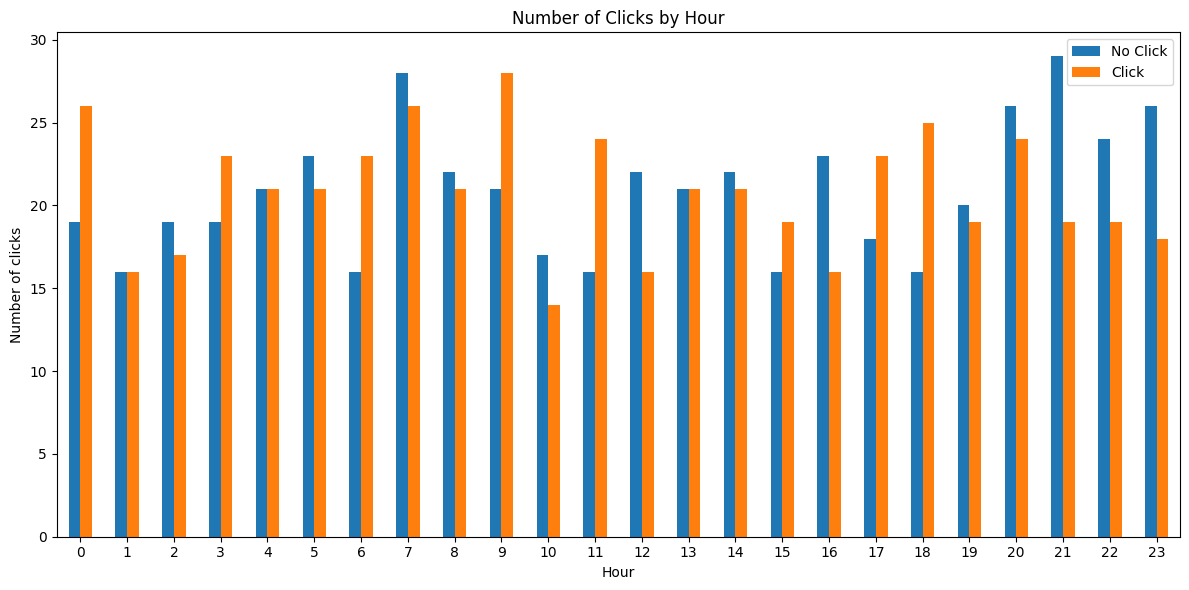

In [29]:
# Group the data by 'Hour' and 'Clicked on Ad', then pivot it to create separate columns for click and no click
grouped = ad_df.groupby(['Hour', 'Clicked on Ad']).size().unstack()

# Plot the counts of clicks and no clicks by hour
fig, ax = plt.subplots(figsize=(12, 6))  # Create figure and axes
grouped.plot(kind='bar', ax=ax)  # Plot using the specified axes
ax.set_ylabel('Number of clicks')  # Set y-axis label
ax.set_title('Number of Clicks by Hour')  # Set title
ax.set_xticklabels(grouped.index, rotation=0)  # Set x-axis tick labels

ax.legend(['No Click', 'Click'])  # Add legend

plt.tight_layout()  # Adjust layout for better appearance
plt.show()


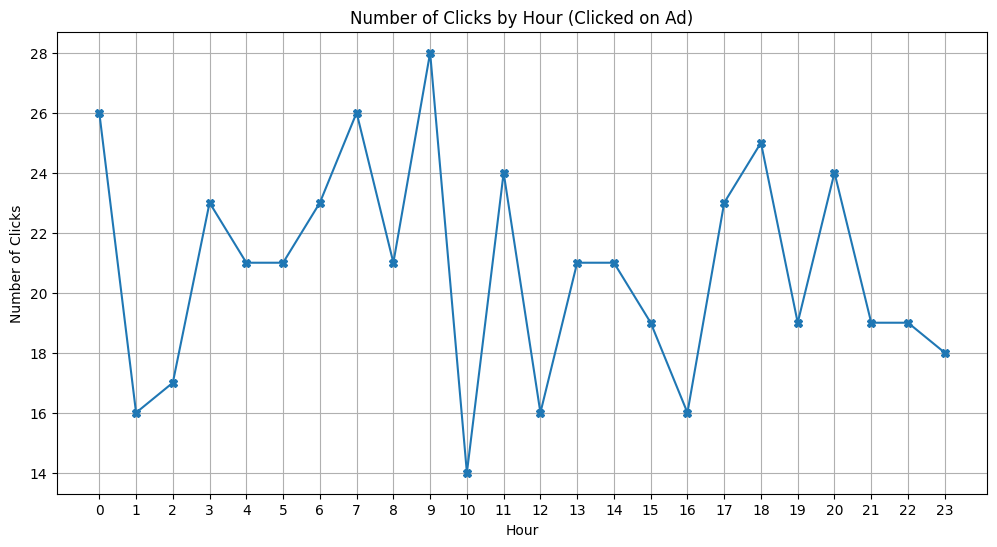

In [42]:
# Filter the DataFrame to rows where 'Clicked on Ad' is True
clicked_df = ad_df[ad_df['Clicked on Ad'] == True]

# Group the filtered data by 'Hour' and sum the clicks
clicks_by_hour = clicked_df.groupby('Hour')['Clicked on Ad'].sum()

# Create a line plot for the counts of clicks by hour
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(clicks_by_hour.index, clicks_by_hour.values, marker='X', linestyle='-')
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Clicks')
ax.set_title('Number of Clicks by Hour (Clicked on Ad)')
ax.set_xticks(clicks_by_hour.index)
ax.grid(True)
plt.show()
